In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("demo.csv")
df.head()

,S.No,item_name,sales
0,1,Cumin Seeds,910
1,2,Cumin Seeds,895
2,3,Cumin Seeds,1233
3,4,Cumin Seeds,1432
4,5,Cumin Seeds,1567


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['item_name'])
df['item_name'] = label
df.head()

,S.No,item_name,sales
0,1,0,910
1,2,0,895
2,3,0,1233
3,4,0,1432
4,5,0,1567


In [46]:
s_df = df[(df.item_name == 1)]
s_df.head()

,S.No,item_name,sales
48,1,1,931
49,2,1,941
50,3,1,1291
51,4,1,1346
52,5,1,1626


In [47]:
s_df.shape

(48, 3)

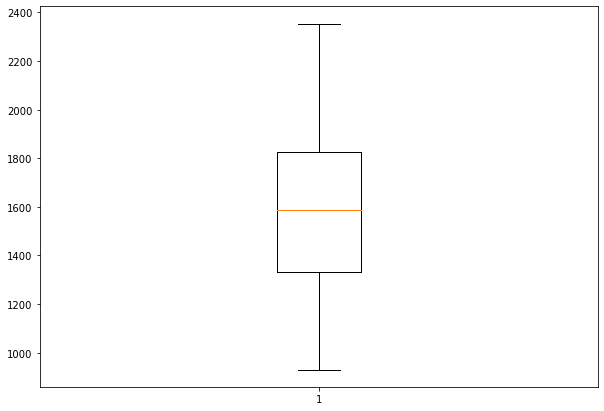

In [48]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(s_df['sales'])
plt.show()

In [49]:
import numpy as np
X = np.array(s_df['S.No']).reshape(-1, 1)
y = np.array(s_df['sales']).reshape(-1, 1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

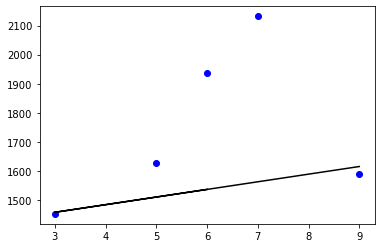

In [52]:
import matplotlib.pyplot as plt
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [53]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 223.53867207298535
Mean Squared Error (MSE): 99946.19560996929
Root Mean Squared Error (RMSE): 316.1426823603059
Mean Absolute Percentage Error (MAPE): 11.31
Accuracy: 88.69


In [54]:
y_pred = regr.predict(np.array(12).reshape(-1, 1))
y_pred

array([[1693.76026356]])

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1048\4153974691.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [56]:
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_pred)

1.0

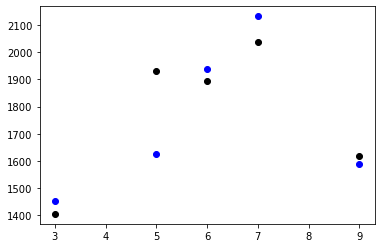

In [57]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='k')
plt.show()

In [58]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 104.26828571428572
Mean Squared Error (MSE): 21418.035796281147
Root Mean Squared Error (RMSE): 146.34902048282095
Mean Absolute Percentage Error (MAPE): 16.38
Accuracy: 83.62


In [59]:
import xgboost as xg

In [60]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [61]:
xgb_r.fit(X_train, y_train)

[11:25:50] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [62]:
y_pred = xgb_r.predict(X_test)

In [63]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 136.9187744140625
Mean Squared Error (MSE): 27460.9208463341
Root Mean Squared Error (RMSE): 165.7133695461356
Mean Absolute Percentage Error (MAPE): 15.06
Accuracy: 84.94


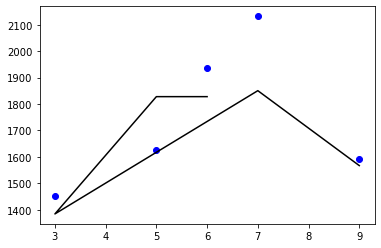

In [64]:
 plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()